<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics
    - This is a regression problem, as opposed to a classification problem (on the demo)

### Import libraries

In [1]:
## Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(keras.__version__)

2.3.0-tf
2.3.0-tf


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [3]:
# insert code here
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [13]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### Prepare input data

In [6]:
# Insert code here
X = diabetes.data # Get feature using data attribute
n_cols = X.shape[1]

# Output
y = diabetes.target

In [7]:
X.shape

(442, 10)

### Split the data (training/test)

In [8]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3)

### Create the model's architecture

In [53]:
# Instantiate architecture
model = Sequential()

# Add first hidden layer, 30 is arbitrary and hyperparameters
model.add(Dense(30, activation = 'relu', input_shape = (n_cols, )))

# Add second hidden layer, 15 is arbitrary and hyperparameters
model.add(Dense(15, activation = 'relu'))

# Add third hidden layer, 5 is arbitrary and hyperparameters
model.add(Dense(5, activation = 'relu'))

# Add output layer, use linear because it is regression
model.add(Dense(1, activation = 'linear'))

In [54]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_30 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 6         
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [55]:
# Optimizer tries to minimize the loss function after every epoch
# Depends on if regression, classification, etc

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mape']) # mean absolute percentage error

### Fit the training data

In [56]:
# Shuffle training data
# from sklearn.utils import shuffle
# X_train2

In [57]:
%%time
# insert code here
# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20, 
    epochs = 100,
    verbose = 1)

Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 27200.0840 - mape: 99.9505 - val_loss: 28837.7988 - val_mape: 99.9088
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 27176.8398 - mape: 99.8747 - val_loss: 28807.7363 - val_mape: 99.8120
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 27142.1191 - mape: 99.7653 - val_loss: 28763.9492 - val_mape: 99.6745
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 27092.2988 - mape: 99.6098 - val_loss: 28701.9238 - val_mape: 99.4817
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 27022.1426 - mape: 99.3883 - val_loss: 28614.4785 - val_mape: 99.2112
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 26924.4570 - mape: 99.0838 - val_loss: 28491.9746 - val_mape: 98.8373
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 26789.7422 - mape: 98.6580 - val_loss: 28324.0215 - val_mape: 98.3293

12/12 [==============================] - 0s 3ms/step - loss: 3414.4524 - mape: 45.4257 - val_loss: 3452.3989 - val_mape: 51.8057
Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 3398.1970 - mape: 45.4366 - val_loss: 3436.5432 - val_mape: 51.6351
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 3383.2195 - mape: 45.1886 - val_loss: 3422.0725 - val_mape: 51.3276
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 3369.3572 - mape: 44.8991 - val_loss: 3408.5076 - val_mape: 51.0781
Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 3355.9050 - mape: 44.7105 - val_loss: 3393.1531 - val_mape: 50.7828
Epoch 63/100
12/12 [==============================] - 0s 3ms/step - loss: 3346.6506 - mape: 44.6450 - val_loss: 3375.0688 - val_mape: 50.7920
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 3334.2498 - mape: 44.3657 - val_loss: 3368.6338 - val_mape: 50.2638
Epoch 65/100
12/12 

### Create predictions

In [58]:
# insert code here
predictions = model.predict(X_test)
predictions

array([[ 86.96007 ],
       [144.26802 ],
       [225.83986 ],
       [183.18494 ],
       [163.0701  ],
       [210.43703 ],
       [187.8062  ],
       [204.24129 ],
       [204.55666 ],
       [254.64276 ],
       [166.43462 ],
       [135.39424 ],
       [103.34682 ],
       [170.81512 ],
       [176.67412 ],
       [138.87663 ],
       [139.29698 ],
       [106.40441 ],
       [ 89.87723 ],
       [198.31898 ],
       [278.48434 ],
       [140.05855 ],
       [ 92.6588  ],
       [135.11365 ],
       [199.55074 ],
       [131.26274 ],
       [106.01468 ],
       [188.19176 ],
       [150.39067 ],
       [153.43333 ],
       [191.26715 ],
       [155.23488 ],
       [220.18404 ],
       [184.53395 ],
       [223.69717 ],
       [179.8647  ],
       [223.00755 ],
       [139.16582 ],
       [166.44542 ],
       [130.08887 ],
       [188.72993 ],
       [226.55505 ],
       [154.6792  ],
       [141.21794 ],
       [177.38333 ],
       [122.05316 ],
       [181.58452 ],
       [181.2

### Evaluate the model

In [59]:
# insert code here
score = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 839us/step - loss: 3334.6890 - mape: 39.8566


In [50]:
# we want mape to be lower
score 

[3339.542724609375, 40.279239654541016]

In [51]:
# Find RMSE
score[0] ** (1/2)

57.78877680492446

In [52]:
y.mean()

152.13348416289594

In [44]:
print(y.min())
print(y.max())

25.0
346.0


### Visualisation of cost

In [48]:
history.history

{'loss': [3148.0966796875,
  3143.23486328125,
  3139.156494140625,
  3132.754150390625,
  3128.234375,
  3125.193359375,
  3118.872802734375,
  3113.949462890625,
  3109.658935546875,
  3105.56494140625,
  3100.68603515625,
  3096.821533203125,
  3092.072998046875,
  3087.48291015625,
  3082.8828125,
  3079.23486328125,
  3075.56298828125,
  3071.63525390625,
  3066.316650390625,
  3061.546875,
  3057.7509765625,
  3053.67919921875,
  3049.756103515625,
  3045.01171875,
  3043.8310546875,
  3036.599609375,
  3033.505859375,
  3030.880126953125,
  3024.953369140625,
  3024.259765625,
  3017.408935546875,
  3016.774658203125,
  3010.118896484375,
  3006.613525390625,
  3003.8896484375,
  3000.151123046875,
  2996.280517578125,
  2993.00732421875,
  2989.150390625,
  2985.282470703125,
  2982.22216796875,
  2979.09912109375,
  2975.524169921875,
  2972.487548828125,
  2968.951416015625,
  2966.1669921875,
  2962.373046875,
  2959.48828125,
  2956.710693359375,
  2953.494384765625,
  2951

KeyError: 'mse'

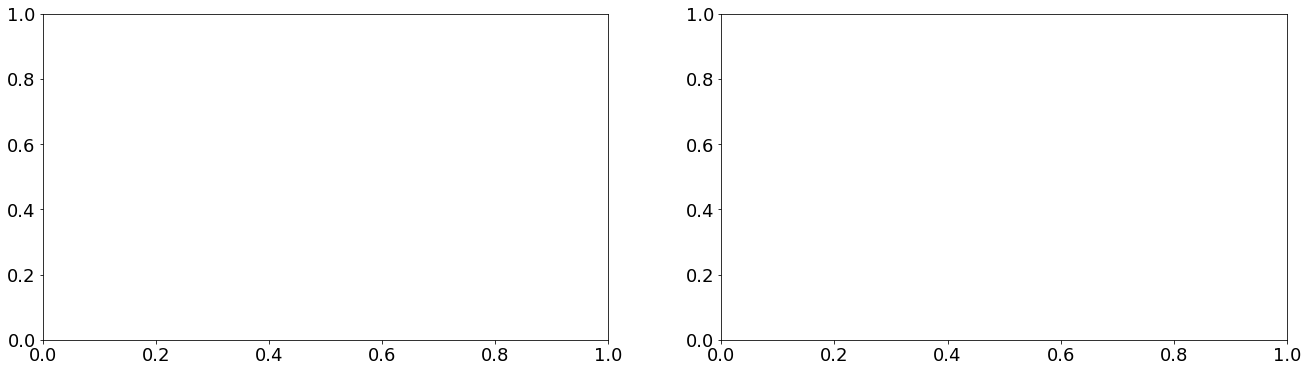

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['mape'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['mse'], label = 'Training')
ax[1].plot(history.history['mape'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [45]:
# insert code here
def print_cm(cm):
    c = '%%%dd ' % len('%d' % cm.max())
    s = ' | '
    s += ''.join([c % i for i in range(len(cm[0]))])
    print(s)
    print('-' * len(s))
    for i, r in enumerate(cm):
        s = '%d| ' % i
        s += c * len(r)
        print(s % tuple(r))

In [46]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### Visualisation of residuals

In [61]:
# insert code here
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
r2

0.45833840949904703

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



